## Abstract:
A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the
companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying different criteria like
previous orders, mostly searched brands and so on.

## Problem Statement:
Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest.

## Dataset Information:
The data was collected from a well known e-commerce website over a
period of time based on the customer’s search profile.


## Scope:
1. Analyzing the existing customer data and getting valuable insights
about the purchase pattern
2. Data pre-processing including missing value treatment
3. Segmenting customer based on the optimum number of clusters (‘k’)
with the help of silhouette score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('cust_data.xlsx')

In [3]:
df.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0      0  
1          0           0         0          0          0      0  
2          0           0         0          1          0      0  
3          0           0         0          0          0      0  
4          0           0         0          0          1      1  

[5 rows x 38 columns]

In [4]:
df.shape

(30000, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
df.describe().T

count          mean          std  min      25%  \
Cust_ID                 30000.0  15000.500000  8660.398374  1.0  7500.75   
Orders                  30000.0      4.169800     3.590311  0.0     1.00   
Jordan                  30000.0      0.267433     0.804778  0.0     0.00   
Gatorade                30000.0      0.252333     0.705368  0.0     0.00   
Samsung                 30000.0      0.222933     0.917494  0.0     0.00   
Asus                    30000.0      0.161333     0.740038  0.0     0.00   
Udis                    30000.0      0.143533     0.641258  0.0     0.00   
Mondelez International  30000.0      0.139767     0.525840  0.0     0.00   
Wrangler                30000.0      0.106933     0.515921  0.0     0.00   
Vans                    30000.0      0.111433     0.547990  0.0     0.00   
Fila                    30000.0      0.094267     0.531592  0.0     0.00   
Brooks                  30000.0      0.140133     0.471278  0.0     0.00   
H&M                     30000.0      0.328200     0.807655  0.0     0.00   
Dairy Queen             30000.0      0.209333     1.116820  0.0     0.00   
Fendi                   30000.0      0.141467     0.529210  0.0     0.00   
Hewlett Packard         30000.0      0.161100     0.604835  0.0     0.00   
Pladis                  30000.0      0.106100     0.516512  0.0     0.00   
Asics                   30000.0      0.300233     1.119167  0.0     0.00   
Siemens                 30000.0      0.048067     0.338763  0.0     0.00   
J.M. Smucker            30000.0      0.754800     1.262166  0.0     0.00   
Pop Chips               30000.0      0.247900     0.724106  0.0     0.00   
Juniper                 30000.0      0.470833     1.346159  0.0     0.00   
Huawei                  30000.0      0.258000     0.848288  0.0     0.00   
Compaq                  30000.0      0.118767     0.597612  0.0     0.00   
IBM                     30000.0      0.031967     0.264475  0.0     0.00   
Burberry                30000.0      0.428033     1.098876  0.0     0.00   
Mi                      30000.0      0.121333     0.478977  0.0     0.00   
LG                      30000.0      0.102533     0.486376  0.0     0.00   
Dior                    30000.0      0.271133     0.714682  0.0     0.00   
Scabal                  30000.0      0.370067     0.758465  0.0     0.00   
Tommy Hilfiger          30000.0      0.158967     0.510527  0.0     0.00   
Hollister               30000.0      0.077667     0.383370  0.0     0.00   
Forever 21              30000.0      0.057333     0.300082  0.0     0.00   
Colavita                30000.0      0.192200     0.641306  0.0     0.00   
Microsoft               30000.0      0.116367     0.446578  0.0     0.00   
Jiffy mix               30000.0      0.088033     0.399277  0.0     0.00   
Kraft                   30000.0      0.070900     0.387915  0.0     0.00   

                            50%       75%      max  
Cust_ID                 15000.5  22500.25  30000.0  
Orders                      4.0      7.00     12.0  
Jordan                      0.0      0.00     24.0  
Gatorade                    0.0      0.00     15.0  
Samsung                     0.0      0.00     27.0  
Asus                        0.0      0.00     17.0  
Udis                        0.0      0.00     14.0  
Mondelez International      0.0      0.00     31.0  
Wrangler                    0.0      0.00      9.0  
Vans                        0.0      0.00     16.0  
Fila                        0.0      0.00     15.0  
Brooks                      0.0      0.00     12.0  
H&M                         0.0      0.00     18.0  
Dairy Queen                 0.0      0.00    114.0  
Fendi                       0.0      0.00     18.0  
Hewlett Packard             0.0      0.00     10.0  
Pladis                      0.0      0.00     26.0  
Asics                       0.0      0.00     66.0  
Siemens                     0.0      0.00     11.0  
J.M. Smucker                0.0      1.00     64.0  
Pop Chips               

In [7]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
df[(df['Gender']!='M') & (df['Gender']!='F')]

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
4            5    NaN      10       0         0        0     0     0   
13          14    NaN       0       0         0        0     0     5   
15          16    NaN       0       0         0        0     0     0   
16          17    NaN       4       0         0        0     0     0   
41          42    NaN       0       0         0        0     0     0   
...        ...    ...     ...     ...       ...      ...   ...   ...   
29905    29906    NaN      10       0         0        0     0     0   
29928    29929    NaN       3       0         0        0     0     0   
29931    29932    NaN       1       0         0        0     0     0   
29970    29971    NaN       0       0         0        0     0     0   
29971    29972    NaN       6       0         0        0     0     0   

       Mondelez International  Wrangler  ...  LG  Dior  Scabal  \
4                           0         0  ...   0     0       2   
13                          0         0  ...   0     0       0   
15                          0         0  ...   0     0       0   
16                          0         0  ...   0     0       0   
41                          0         0  ...   0     0       0   
...                       ...       ...  ...  ..   ...     ...   
29905                       0         0  ...   0     1       0   
29928                       0         0  ...   0     0       0   
29931                       0         0  ...   0     0       0   
29970                       0         0  ...   0     0       0   
29971                       0         0  ...   0     0       0   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
4                   0          0           0         0          0          1   
13                  0          0           0         0          0          0   
15                  0          0           0         0          0          0   
16                  0          0           0         0          0          0   
41                  0          0           0         0          0          0   
...               ...        ...         ...       ...        ...        ...   
29905               0          0           0         0          0          0   
29928               0          0           0         0          0          0   
29931               0          0           0         0          0          0   
29970               0          0           0         0          0          0   
29971               0          0           0         0          0          0   

       Kraft  
4          1  
13         0  
15         0  
16         0  
41         0  
...      ...  
29905      0  
29928      0  
29931      0  
29970      0  
29971      0  

[2724 rows x 38 columns]

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [11]:
df.drop('Cust_ID',axis=1,inplace=True)

In [12]:
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

## Seeing Outliers

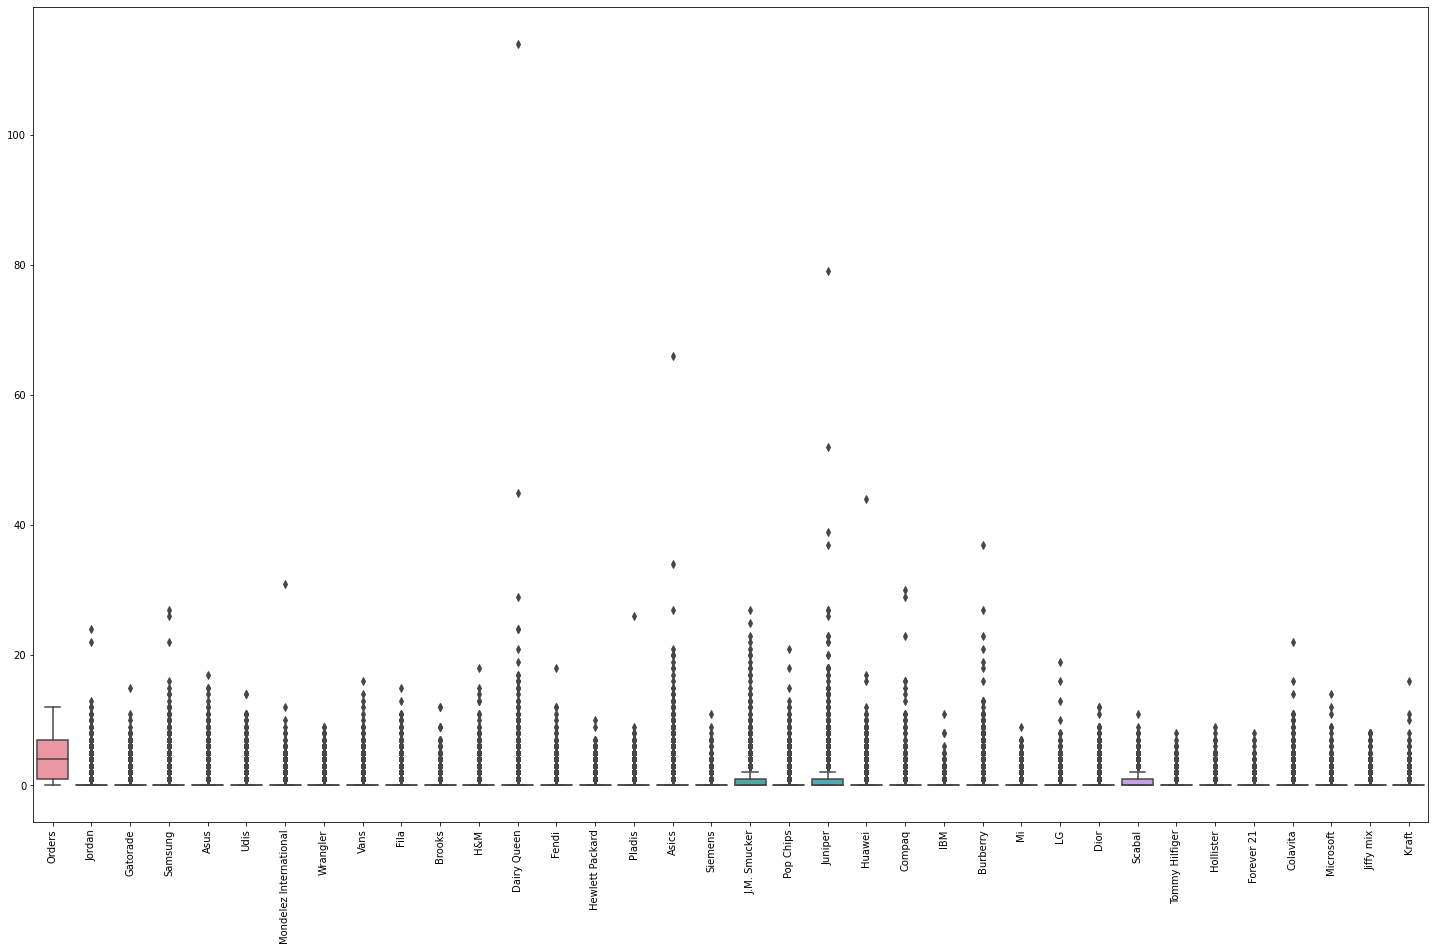

In [13]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df);
plt.xticks(rotation=90);

In [14]:
for column in df.columns:
    value_count = df[column].value_counts()
    print(f"{column}': {value_count}")

Gender': F    22054
M     5222
Name: Gender, dtype: int64
Orders': 0     6294
1     2488
2     2221
3     2056
7     2048
4     2010
8     1911
6     1886
5     1872
9     1842
10    1802
12     435
11     411
Name: Orders, dtype: int64
Jordan': 0     22748
1      2911
2       939
3       356
4       154
5        81
6        38
7        18
8        11
9         6
10        5
12        3
11        3
22        1
24        1
13        1
Name: Jordan, dtype: int64
Gatorade': 0     22598
1      3201
2       913
3       341
4       113
5        51
6        26
7        22
8         7
10        1
11        1
9         1
15        1
Name: Gatorade, dtype: int64
Samsung': 0     24394
1      1564
2       593
3       263
4       176
5       100
6        73
7        41
8        31
10       10
9         9
12        7
11        7
14        2
22        1
13        1
15        1
26        1
27        1
16        1
Name: Samsung, dtype: int64
Asus': 0     25002
1      1315
2       434
3       212
4     

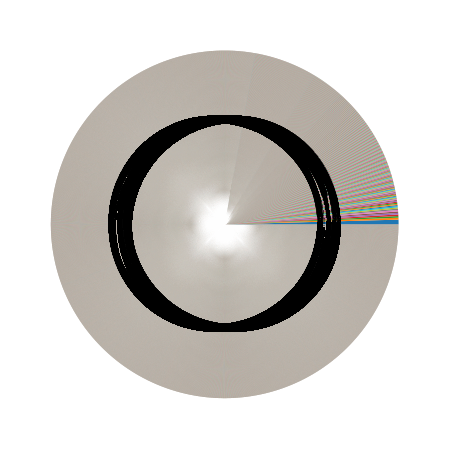

In [15]:
plt.figure(figsize=(15,8))
plt.pie(df.value_counts(),autopct='%1.1f%%');

In [16]:
df['Dairy Queen'].value_counts()

0      24296
1       1801
2        608
3        251
4        135
5         59
6         37
7         22
10        16
8         13
9         10
12         5
11         4
16         3
13         3
15         3
24         2
17         2
21         1
45         1
29         1
19         1
114        1
14         1
Name: Dairy Queen, dtype: int64

In this scenario, we have a large proportion of the data (80%) with zero values, and the remaining 20% of the data falls within a reasonable range of 1 to 100. Since the majority of the data is zero, it is unlikely that the non-zero values are true outliers, but rather represent the true range of the data.

Therefore, treating the non-zero values as outliers and removing them may not be appropriate in this case. Instead, we need to consider the context of the data and why there are so many zeros. It's possible that these zero values are valid and meaningful, such as representing a particular category or condition where the value should be zero.

### Visualization

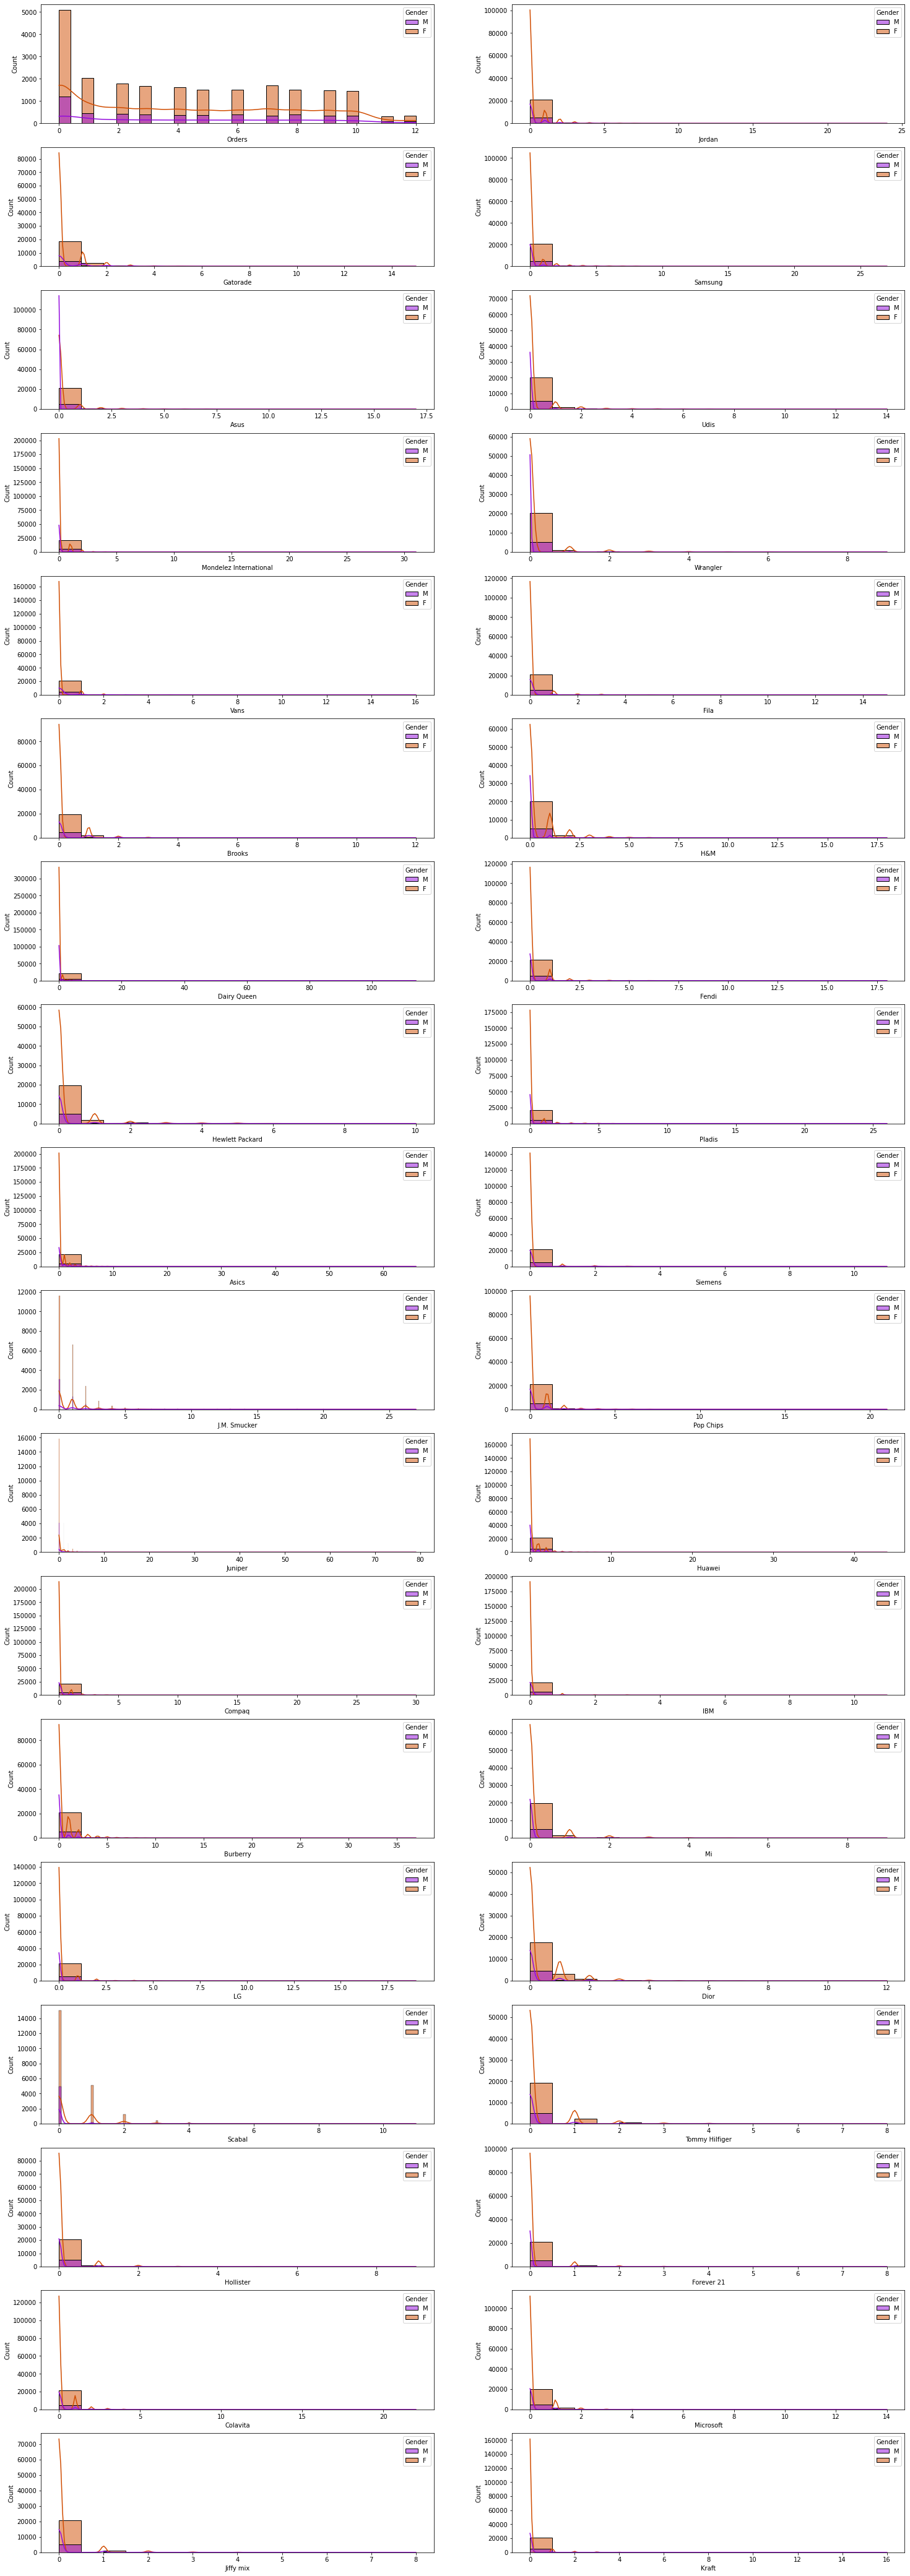

In [17]:
plt.figure(figsize=(25,80))
i=1
for k in df.columns:
    if k!='Gender' and i<38:
        plt.subplot(19,2,i)
        sns.histplot(x=k,data=df,kde=True,palette='gnuplot',hue='Gender')
        i+=1

In [18]:
# Female is more dominant in every company. As compare to male, females ordered the maxium things.

The dataset reveals that females have consistently placed more orders across all brands of the company. This trend can be seen in the data for each brand, as well as in the overall data for the company. Although the exact reasons for this trend are unclear, it suggests that females are more likely to engage in online shopping and order more frequently than males.

This insight is of significant importance to the company, as it provides a valuable understanding of their customer base. The data suggests that the company should focus on targeting female customers in their marketing efforts and tailor their products and services to better suit their needs.

In [19]:
gender=['Female','Male']
gender

['Female', 'Male']

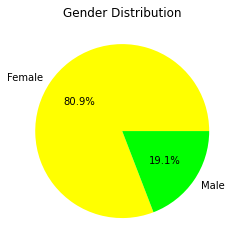

In [20]:
plt.pie(df['Gender'].value_counts(),labels=gender, autopct='%1.1f%%',colors=['yellow','lime'])
plt.title('Gender Distribution');

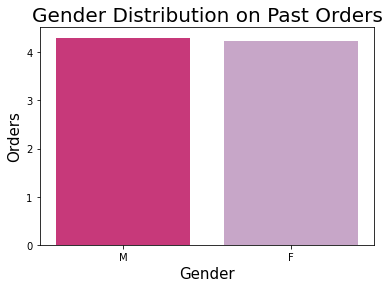

In [21]:
sns.barplot(x='Gender',y='Orders',data=df,ci=None,palette='PuRd_r');
plt.title("Gender Distribution on Past Orders",fontsize=20);
plt.xlabel('Gender',fontsize=15);
plt.ylabel('Orders',fontsize=15);

The count plot of gender clearly indicates that female customers are more present in the data than male customers. However, when examining the data on past orders, it was found that males had slightly higher order rates than females at one point in time. Possible explanations for this trend may include changes in product offerings or marketing strategies, as well as shifts in the preferences of male and female customers over time. Further analysis may be needed to identify the underlying factors driving these trends and to develop strategies to address any potential gender-based disparities in the business.

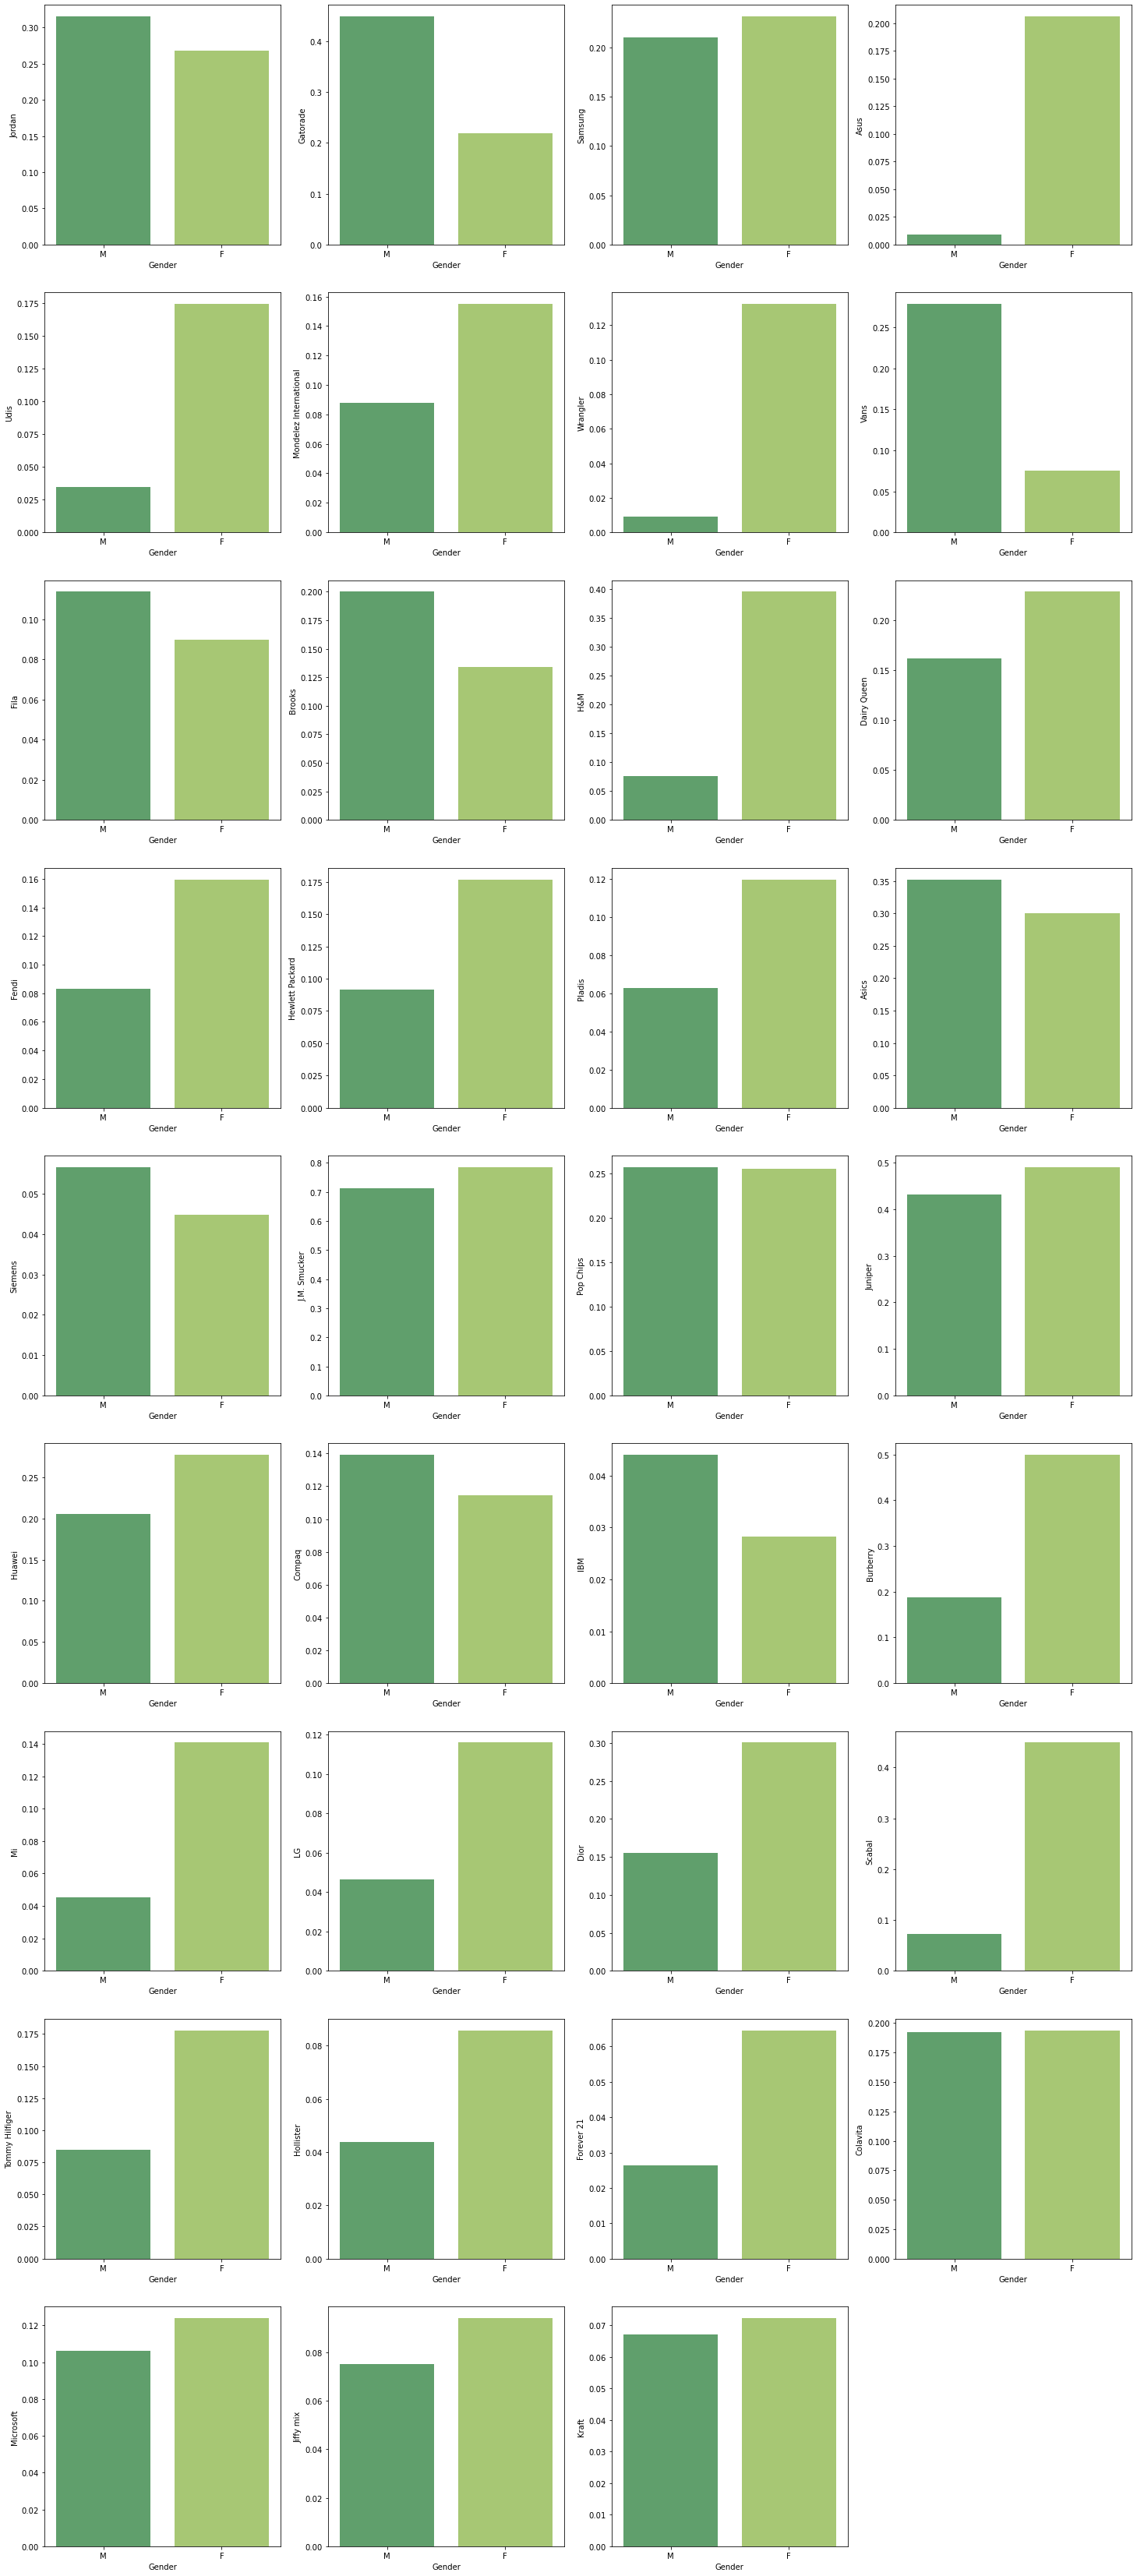

In [22]:
plt.figure(figsize=(25,60))
i=1
for k in df.columns:
    if k!='Gender'and k!='Orders' and i<38:
        plt.subplot(9,4,i)
        sns.barplot(y=k,x='Gender',data=df,palette='summer',ci=None)
        i+=1

This bar plot presents an analysis of the most searched company brands by gender. The x-axis shows the two genders, male and female, while the y-axis displays the number of searches for each brand.

The bar plot displays the most searched company brands by each gender.The bars are color-coded based on the gender, with Dark green representing male and olive representing female.

The analysis shows that there are some notable differences in the brand preferences between males and females. For instance, the top searched brands by males were Jordan, Gatorade, Vans, Fila, Brooks, Asics, Siemens, Compaq, IBM  while the top searched brands by females were "Samsung", "Asus", "Udis","Mondelez International", "Wrangler", "H&M", "Dairy Queen", "Fendi", "Hewlett Packard", "Pladis","J.M. Smucker","Juniper","Huawei","Burberry","Mi","LG","Dior","Scabal","Tommy Hilfiger", "Hollister","Forever 21","Microsoft","Jiffy mix","Kraft". However, there were also some brands that were equally popular among both genders, such as Colavita, J.M. Smucker, Popchips.

Conclusion: In summary, this bar plot illustrates the brand preferences of males and females based on their online searches. The results suggest that gender may play a role in shaping consumer behavior and highlight the importance of companies tailoring their marketing strategies to target different gender demographics

male- Jordan, Gatorade, Vans, Fila, Brooks, Asics, Siemens, Compaq, IBM

Female- "Samsung", "Asus", "Udis","Mondelez International", "Wrangler", "H&M", "Dairy Queen", "Fendi",
       "Hewlett Packard", "Pladis","J.M. Smucker","Juniper","Huawei","Burberry","Mi","LG","Dior","Scabal","Tommy Hilfiger",
      "Hollister","Forever 21","Microsoft","Jiffy mix","Kraft"

Male & Female- Colavita, J.M. Smucker, Popchips

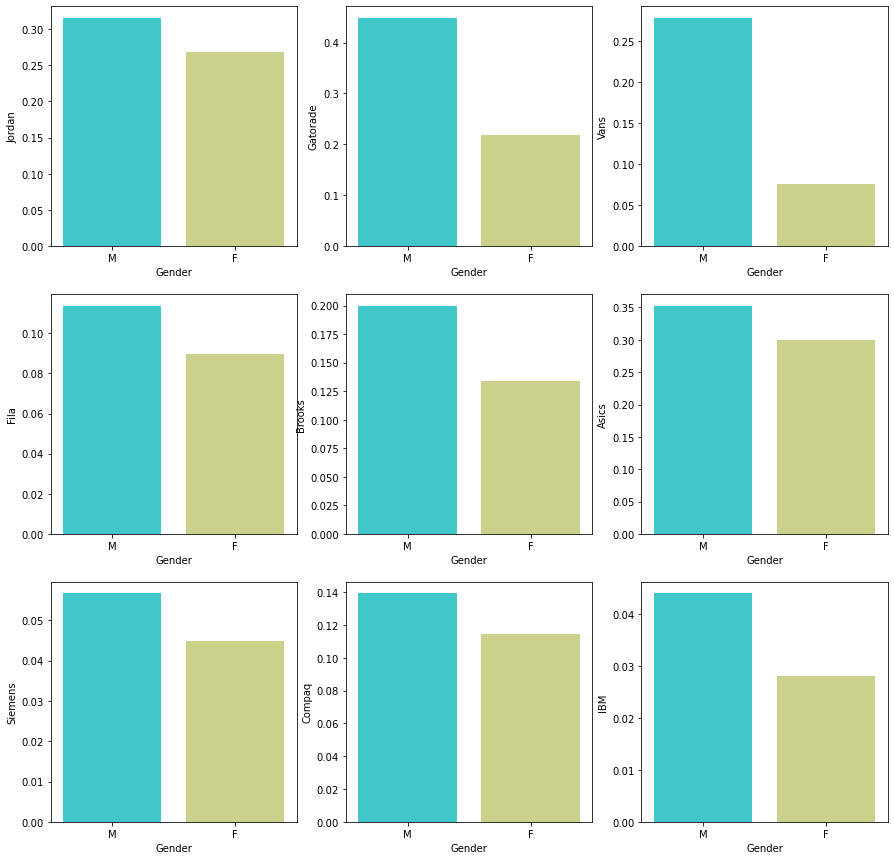

In [23]:
plt.figure(figsize=(15,15))
col_M = ["Jordan", "Gatorade", "Vans", "Fila", "Brooks", "Asics", "Siemens", "Compaq", "IBM"]
i=1
for k in col_M:
    plt.subplot(3,3,i)
    sns.barplot(y=k,x='Gender',data=df,palette='rainbow',ci=None)
    i+=1


We created a set of subplots, with each subplot representing one of the brands. In each subplot, we plotted a bar chart of the number of searches on the y-axis, with gender represented by color (cyan for male and mustard for female) on the x-axis.

The results showed that, for all of the brands, the majority of searches were made by male customers. In particular, the brand Gatorade (sports drink) had the highest number of searches among male customers, followed by Jordan, Vans, Fila, Brooks, Asics which are normally based on sports apparel related company.

Siemens, a German multinational conglomerate operating in various sectors, could explore opportunities to expand offerings in technology and engineering; Compaq, known for computer hardware and software, in technology and computer hardware market; and IBM, an American multinational technology company operating in software, hardware, and consulting, in technology and consulting sectors, given their popularity among males.

In conclusion, the data reveals that males tend to search for specific brands across various fields of the company. By understanding the popularity of these brands, the company can explore opportunities to expand its offerings and improve its prospects in the relevant markets.




Male- Among the listed brands, Jordan and Gatorade are the most preferred by males. Both brands are related to sports and fitness, indicating a strong interest among males in these areas. Vans and Fila also have a significant male following, suggesting a preference for casual and trendy footwear. Asics and Brooks are popular among runners and fitness enthusiasts. Siemens and Compaq have a strong male customer base in the technology and engineering sectors. IBM also has a significant male following, indicating a preference for its technology and consulting services.

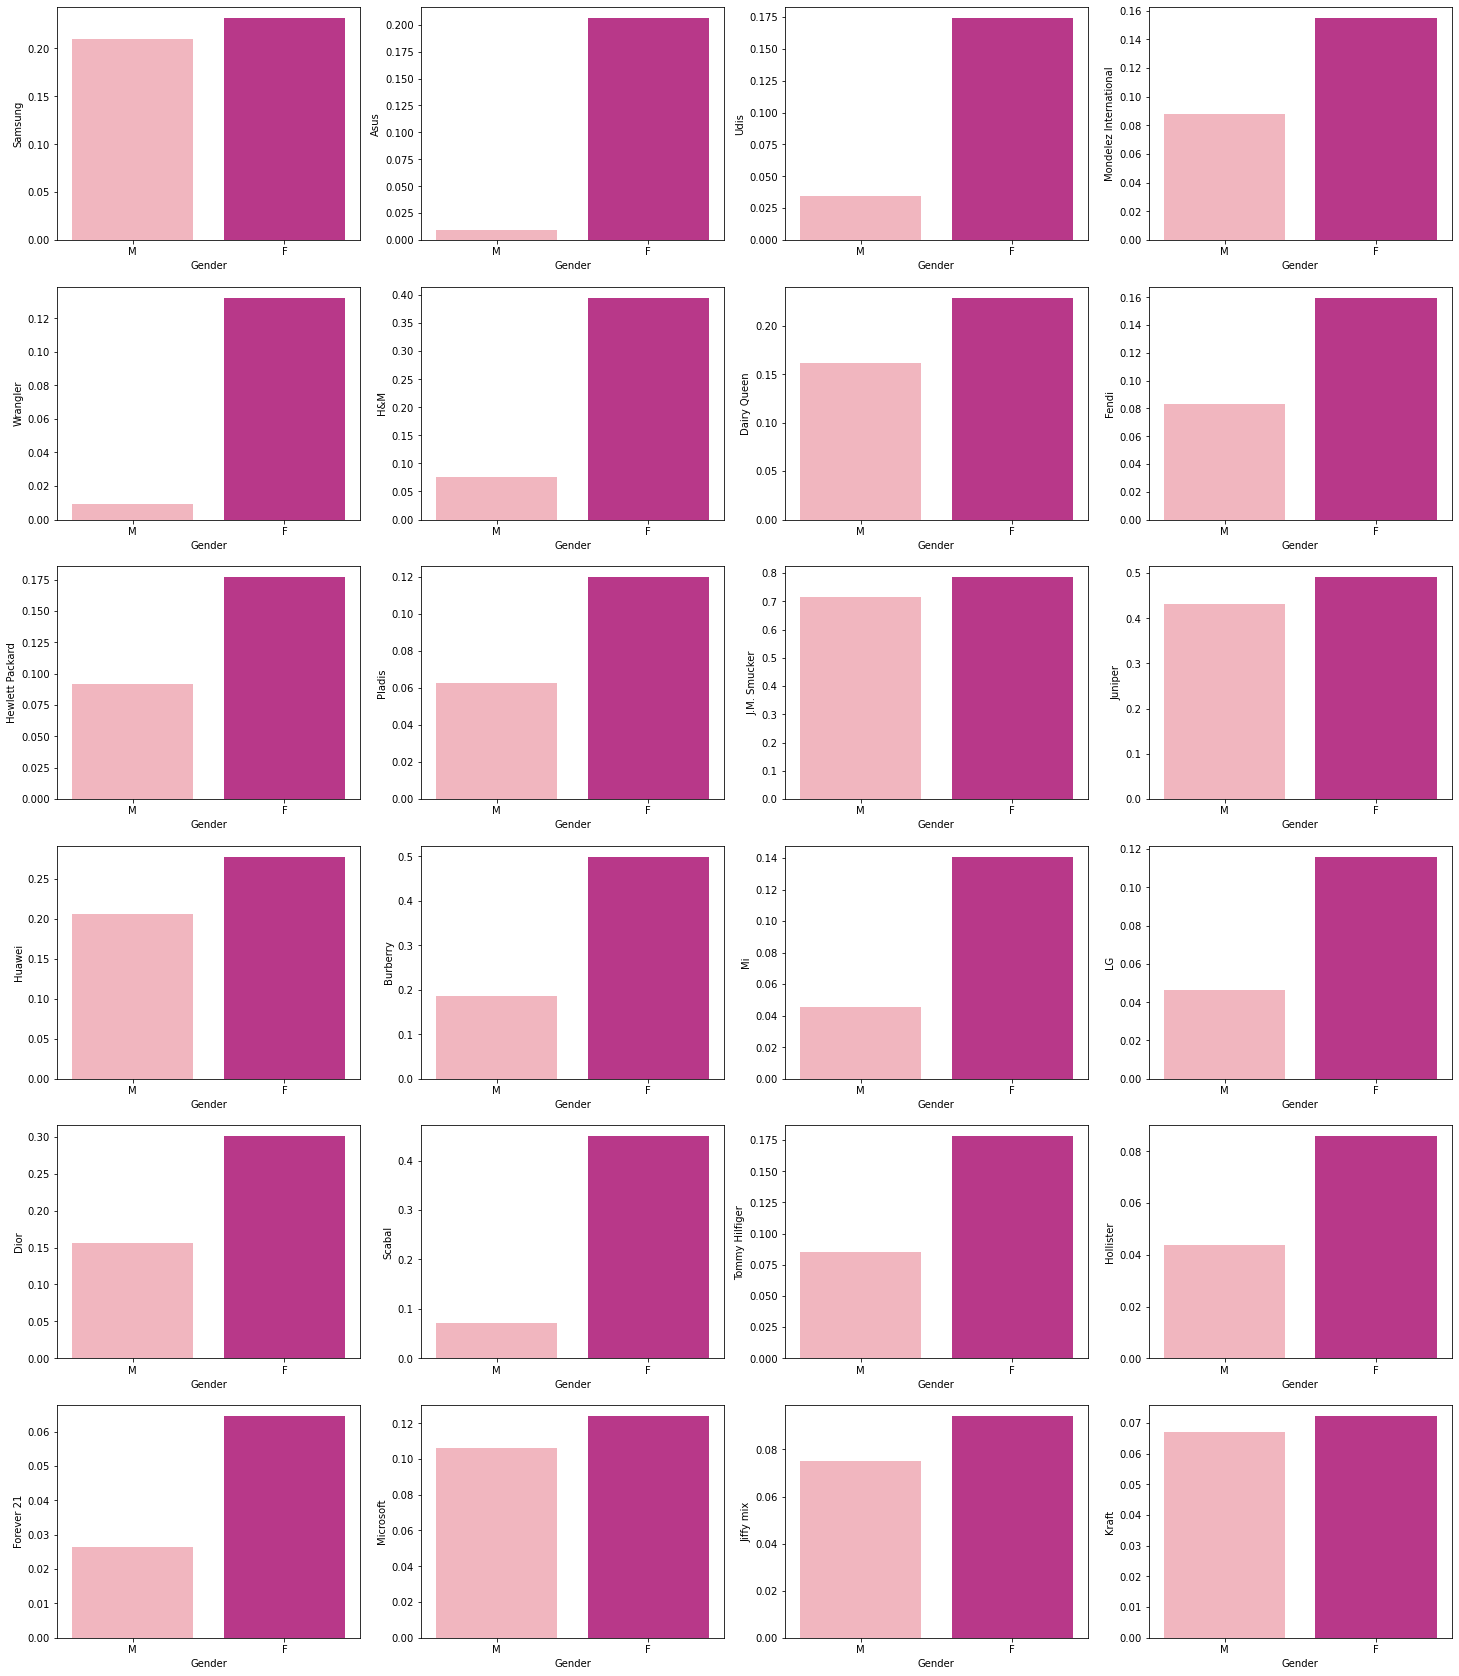

In [24]:
plt.figure(figsize=(25,30))
col_F=["Samsung", "Asus", "Udis","Mondelez International", "Wrangler", "H&M", "Dairy Queen", "Fendi",
       "Hewlett Packard", "Pladis","J.M. Smucker","Juniper","Huawei","Burberry","Mi","LG","Dior","Scabal","Tommy Hilfiger",
      "Hollister","Forever 21","Microsoft","Jiffy mix","Kraft"]
i=1
for k in col_F:
    plt.subplot(6,4,i)
    sns.barplot(y=k,x='Gender',data=df,palette='RdPu',ci=None)
    i+=1

Female- Samsung and Asus are the most preferred technology brands among females, indicating a strong interest in electronic devices. Udis and Mondelez International are popular food brands among females, suggesting a preference for healthy and organic food products. Wrangler, H&M, Fendi, and Tommy Hilfiger are popular clothing brands among females, indicating a preference for stylish and trendy apparel. Dairy Queen is a popular dessert and fast-food brand among females. Pladis and J.M. Smucker are popular food brands preferred by both genders.

Male & Female- Colavita, Popchips

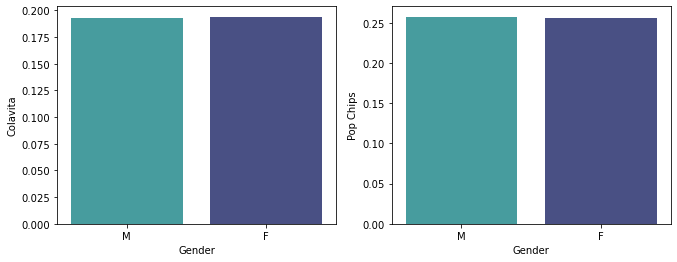

In [25]:
plt.figure(figsize=(11,4))
col_M_F=["Colavita", "Pop Chips"]
i=1
for k in col_M_F:
    plt.subplot(1,2,i)
    sns.barplot(y=k,x='Gender',data=df,palette='mako_r',ci=None)
    i+=1

Male & Female- Colavita and Popchips are preferred by both genders, suggesting a wide appeal among consumers for their food products. J.M. Smucker is another food brand that has a strong following among both males and females.

## Scaling the Data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X=StandardScaler()

In [28]:
scaled_df=pd.DataFrame(X.fit_transform(df.iloc[:,1:]),columns=df.columns[1:])

In [29]:
scaled_df.head(10)

Orders    Jordan  Gatorade   Samsung      Asus      Udis  \
0  0.769488 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
1 -1.185404 -0.338643  1.024969 -0.245906 -0.222324 -0.224761   
2  0.769488 -0.338643  1.024969 -0.245906 -0.222324 -0.224761   
3 -1.185404 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
4 -0.068323 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
5  0.490218 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
6  1.328029 -0.338643 -0.365376 -0.245906  1.097396 -0.224761   
7 -0.906134 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
8 -1.185404 -0.338643 -0.365376 -0.245906 -0.222324 -0.224761   
9  1.048759  2.107550 -0.365376 -0.245906 -0.222324 -0.224761   

   Mondelez International  Wrangler      Vans      Fila  ...        LG  \
0               -0.268186 -0.209144  3.405184 -0.178306  ... -0.208677   
1               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
2               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
3               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
4               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
5               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
6               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
7               -0.268186 -0.209144  3.405184 -0.178306  ... -0.208677   
8               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   
9               -0.268186 -0.209144 -0.206357 -0.178306  ... -0.208677   

       Dior    Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
0 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
1  1.014999 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
2 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
3 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
4 -0.380912  0.819711       -0.315652  -0.202524   -0.191534 -0.308395   
5  2.410910 -0.495568       -0.315652   5.003930   -0.191534 -0.308395   
6 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
7 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   
8 -0.380912  0.819711       -0.315652  -0.202524   -0.191534 -0.308395   
9 -0.380912 -0.495568       -0.315652  -0.202524   -0.191534 -0.308395   

   Microsoft  Jiffy mix     Kraft  
0  -0.263661  -0.223605 -0.183886  
1  -0.263661  -0.223605 -0.183886  
2   1.921579  -0.223605 -0.183886  
3  -0.263661  -0.223605 -0.183886  
4  -0.263661   2.244648 -0.183886  
5  -0.263661  -0.223605 -0.183886  
6  -0.263661  -0.223605 -0.183886  
7  -0.263661  -0.223605 -0.183886  
8  -0.263661  -0.223605 -0.183886  
9  -0.263661  -0.223605 -0.183886  

[10 rows x 36 columns]

## Creating Clusters using KMeans

In [30]:
from sklearn.cluster import KMeans

### Forming 2 cluster with K=2

In [31]:
k_mean=KMeans(n_clusters=2,random_state=1)

In [32]:
k_mean.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [33]:
k_mean.inertia_

934733.5513766584

### Calculating WSS for other values of K - Elbow Method

In [34]:
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(scaled_df)
    wss.append(km.inertia_)

In [35]:
wss

[981936.0000000005,
 934733.5513766584,
 909828.8964247317,
 886773.941457303,
 864923.8361989716,
 848240.1611181919,
 827439.1844236705,
 812244.6765463123,
 797781.8518040858,
 782078.6084946032]

<AxesSubplot:>

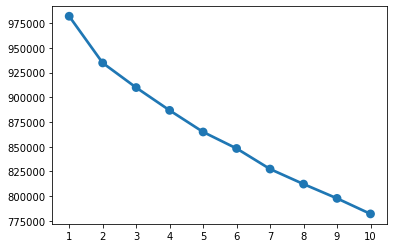

In [36]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss)

In [37]:
from sklearn.metrics import silhouette_score,silhouette_samples

### KMeans with K2

In [38]:
k_means=KMeans(n_clusters=2,random_state=1)
k_means.fit(scaled_df)
labels2=k_means.labels_

In [39]:
sil_score=silhouette_score(scaled_df,labels=labels2,random_state=1)
sil_score

0.4175748213757224

### KMeans with K3

In [40]:
k_means=KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_df)
labels3=k_means.labels_

In [41]:
sil_score=silhouette_score(scaled_df,labels=labels3,random_state=1)
sil_score

0.2744380179696145

### KMeans with K6

In [42]:
k_means=KMeans(n_clusters=6,random_state=1)
k_means.fit(scaled_df)
labels6=k_means.labels_

In [43]:
sil_score=silhouette_score(scaled_df,labels=labels6,random_state=1)
sil_score

0.0194457297134675

### KMeans with K7

In [44]:
k_means=KMeans(n_clusters=7,random_state=1)
k_means.fit(scaled_df)
labels7=k_means.labels_

In [45]:
sil_score=silhouette_score(scaled_df,labels=labels7,random_state=1)
sil_score

0.19244773902204934

In [46]:
# Here I choose K=2, no of cluster=2 because it's silhouette score is higher than others

### Cluster Evaluation for 2 cluster

In [47]:
sil_wid=silhouette_samples(scaled_df,labels2,)
sil_wid

array([ 0.51862158, -0.20306437,  0.54023824, ...,  0.56907313,
        0.59475256,  0.5473847 ])

In [48]:
df['sil_width']=sil_wid

In [49]:
df.head()

Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0      M       7       0         0        0     0     0   
1      F       0       0         1        0     0     0   
2      M       7       0         1        0     0     0   
3      F       0       0         0        0     0     0   
5      F       4       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  ...  Dior  Scabal  Tommy Hilfiger  \
0                       0         0     2  ...     0       0               0   
1                       0         0     0  ...     1       0               0   
2                       0         0     0  ...     0       0               0   
3                       0         0     0  ...     0       0               0   
5                       0         0     0  ...     0       1               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  sil_width  
0          0           0         0          0          0      0   0.518622  
1          0           0         0          0          0      0  -0.203064  
2          0           0         0          1          0      0   0.540238  
3          0           0         0          0          0      0   0.582760  
5          0           0         0          0          1      0   0.455610  

[5 rows x 38 columns]

In [50]:
df['sil_width'].mean()

0.41757482137572255

In [51]:
df['sil_width'].min()

-0.4289511415291234

In [52]:
df['sil_width'].max()

0.6229365429577876

In [53]:
df1=df[df['sil_width']<=0]

In [54]:
df[df['sil_width']<=0]

Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
1          F       0       0         1        0     0     0   
27         M       0       0         0        0     0     0   
39         F       0       0         0        0     0     0   
54         M       5       0         0        1     0     0   
57         M       5       0         0        0     0     0   
...      ...     ...     ...       ...      ...   ...   ...   
29945      F       1       0         0        1     0     0   
29972      F       9       0         0        0     0     1   
29979      F       9       0         3        0     0     0   
29986      M       0       0         1        0     0     0   
29991      F       4       3         0        0     0     0   

       Mondelez International  Wrangler  Vans  ...  Dior  Scabal  \
1                           0         0     0  ...     1       0   
27                          0         0     0  ...     0       0   
39                          0         0     0  ...     0       0   
54                          1         0     0  ...     0       0   
57                          0         0     1  ...     2       1   
...                       ...       ...   ...  ...   ...     ...   
29945                       0         0     1  ...     0       0   
29972                       1         0     0  ...     1       3   
29979                       0         1     0  ...     1       1   
29986                       1         0     0  ...     0       1   
29991                       2         0     0  ...     1       1   

       Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
1                   0          0           0         0          0          0   
27                  0          0           0         2          0          1   
39                  0          0           0         1          0          1   
54                  2          1           1         0          0          0   
57                  1          0           0         1          0          0   
...               ...        ...         ...       ...        ...        ...   
29945               2          0           0         0          0          0   
29972               1          2           0         0          0          0   
29979               0          0           0         1          1          1   
29986               0          2           2         0          0          2   
29991               0          0           0         1          1          0   

       Kraft  sil_width  
1          0  -0.203064  
27         0  -0.275106  
39         0  -0.217410  
54         0  -0.341019  
57         2  -0.105441  
...      ...        ...  
29945      0  -0.383218  
29972      0  -0.182424  
29979      1  -0.077850  
29986      0  -0.170371  
29991      0  -0.333200  

[2801 rows x 38 columns]

In [70]:
df[df['sil_width']<=0].value_counts().sum()

2801

In [55]:
df1.shape

(2801, 38)

#### Appending Cluster to Original Dataset

In [56]:
df['Kmeans_clus_2']=labels2

In [57]:
df.head()

Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0      M       7       0         0        0     0     0   
1      F       0       0         1        0     0     0   
2      M       7       0         1        0     0     0   
3      F       0       0         0        0     0     0   
5      F       4       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  ...  Scabal  Tommy Hilfiger  \
0                       0         0     2  ...       0               0   
1                       0         0     0  ...       0               0   
2                       0         0     0  ...       0               0   
3                       0         0     0  ...       0               0   
5                       0         0     0  ...       1               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  sil_width  \
0          0           0         0          0          0      0   0.518622   
1          0           0         0          0          0      0  -0.203064   
2          0           0         0          1          0      0   0.540238   
3          0           0         0          0          0      0   0.582760   
5          0           0         0          0          1      0   0.455610   

   Kmeans_clus_2  
0              0  
1              1  
2              0  
3              0  
5              0  

[5 rows x 39 columns]

### Cluster Profiling

In [58]:
df['Kmeans_clus_2'].value_counts().sort_index()

0    24438
1     2838
Name: Kmeans_clus_2, dtype: int64

In [59]:
clust_pro=df.iloc[:,1:].groupby('Kmeans_clus_2').mean()
clust_pro['Freq']=df['Kmeans_clus_2'].value_counts().sort_index()

In [82]:
clust_pro.T

Kmeans_clus_2                      0            1
Orders                      4.223013     4.430937
Jordan                      0.229356     0.686047
Gatorade                    0.224241     0.594785
Samsung                     0.198952     0.473221
Asus                        0.148171     0.343199
Udis                        0.125051     0.340733
Mondelez International      0.122187     0.313953
Wrangler                    0.089246     0.276603
Vans                        0.096612     0.266385
Fila                        0.084991     0.174771
Brooks                      0.114903     0.418605
H&M                         0.255095     1.015152
Dairy Queen                 0.103282     1.187808
Fendi                       0.113184     0.418605
Hewlett Packard             0.141092     0.329105
Pladis                      0.039529     0.707541
Asics                       0.257591     0.763918
Siemens                     0.043580     0.077167
J.M. Smucker                0.659301     1.740662
Pop Chips                   0.188068     0.838266
Juniper                     0.405434     1.113813
Huawei                      0.217162     0.663495
Compaq                      0.100499     0.280127
IBM                         0.027498     0.063425
Burberry                    0.240691     2.150810
Mi                          0.094443     0.363989
LG                          0.056429     0.501057
Dior                        0.203822     0.867512
Scabal                      0.318684     0.877026
Tommy Hilfiger              0.100622     0.672657
Hollister                   0.047549     0.338266
Forever 21                  0.032531     0.270613
Colavita                    0.137286     0.680056
Microsoft                   0.091497     0.371741
Jiffy mix                   0.053728     0.408034
Kraft                       0.032654     0.403805
sil_width                   0.490795    -0.212926
Freq                    24438.000000  2838.000000

In [61]:
row_index = 0  # the index of the row you want to filter

# Filter the row to select values that are greater than 3
filtered_row_values = clust_pro.iloc[row_index][clust_pro.iloc[row_index] > 3]

# Print the filtered row values
print(filtered_row_values)

Orders        4.223013
Freq      24438.000000
Name: 0, dtype: float64


In [62]:
row_index = 0  # the index of the row you want to filter

# Filter the row to select values that are greater than 3
filtered_row_values = clust_pro.iloc[row_index][clust_pro.iloc[row_index] > 2]

# Print the filtered row values
print(filtered_row_values)

Orders        4.223013
Freq      24438.000000
Name: 0, dtype: float64


In [63]:
row_index = 0  # the index of the row you want to filter

# Filter the row to select values that are greater than 3
filtered_row_values = clust_pro.iloc[row_index][clust_pro.iloc[row_index] > 0.2]

# Print the filtered row values
print(filtered_row_values)

Orders              4.223013
Jordan              0.229356
Gatorade            0.224241
H&M                 0.255095
Asics               0.257591
J.M. Smucker        0.659301
Juniper             0.405434
Huawei              0.217162
Burberry            0.240691
Dior                0.203822
Scabal              0.318684
sil_width           0.490795
Freq            24438.000000
Name: 0, dtype: float64


In [64]:
row_index = 0  # the index of the row you want to filter

# Filter the row to select values that are greater than 3
filtered_row_values = clust_pro.iloc[row_index][clust_pro.iloc[row_index] > 0.5]

# Print the filtered row values
print(filtered_row_values)

Orders              4.223013
J.M. Smucker        0.659301
Freq            24438.000000
Name: 0, dtype: float64


In [65]:
row_index = 0  # the index of the row you want to filter

# Filter the row to select values that are greater than 3
filtered_row_values = clust_pro.iloc[row_index][clust_pro.iloc[row_index] > 0.3]

# Print the filtered row values
print(filtered_row_values)

Orders              4.223013
J.M. Smucker        0.659301
Juniper             0.405434
Scabal              0.318684
sil_width           0.490795
Freq            24438.000000
Name: 0, dtype: float64


In [75]:
df1=df[df['Kmeans_clus_2']==1]

In [79]:
df1.describe(include='all').T

count unique  top  freq      mean       std  \
Gender                    2838      2    F  2559       NaN       NaN   
Orders                  2838.0    NaN  NaN   NaN  4.430937  3.540787   
Jordan                  2838.0    NaN  NaN   NaN  0.686047  1.439077   
Gatorade                2838.0    NaN  NaN   NaN  0.594785   1.09022   
Samsung                 2838.0    NaN  NaN   NaN  0.473221   1.50659   
Asus                    2838.0    NaN  NaN   NaN  0.343199  1.191517   
Udis                    2838.0    NaN  NaN   NaN  0.340733  1.118863   
Mondelez International  2838.0    NaN  NaN   NaN  0.313953  0.961594   
Wrangler                2838.0    NaN  NaN   NaN  0.276603  0.866049   
Vans                    2838.0    NaN  NaN   NaN  0.266385  0.825359   
Fila                    2838.0    NaN  NaN   NaN  0.174771  0.766158   
Brooks                  2838.0    NaN  NaN   NaN  0.418605  0.923721   
H&M                     2838.0    NaN  NaN   NaN  1.015152  1.557538   
Dairy Queen             2838.0    NaN  NaN   NaN  1.187808  3.163776   
Fendi                   2838.0    NaN  NaN   NaN  0.418605  1.028446   
Hewlett Packard         2838.0    NaN  NaN   NaN  0.329105  0.823649   
Pladis                  2838.0    NaN  NaN   NaN  0.707541  1.340939   
Asics                   2838.0    NaN  NaN   NaN  0.763918   2.29694   
Siemens                 2838.0    NaN  NaN   NaN  0.077167  0.476483   
J.M. Smucker            2838.0    NaN  NaN   NaN  1.740662  2.244888   
Pop Chips               2838.0    NaN  NaN   NaN  0.838266  1.571329   
Juniper                 2838.0    NaN  NaN   NaN  1.113813  2.950074   
Huawei                  2838.0    NaN  NaN   NaN  0.663495  1.680261   
Compaq                  2838.0    NaN  NaN   NaN  0.280127  1.347107   
IBM                     2838.0    NaN  NaN   NaN  0.063425  0.388676   
Burberry                2838.0    NaN  NaN   NaN   2.15081  2.375965   
Mi                      2838.0    NaN  NaN   NaN  0.363989  0.851919   
LG                      2838.0    NaN  NaN   NaN  0.501057  1.151159   
Dior                    2838.0    NaN  NaN   NaN  0.867512   1.33843   
Scabal                  2838.0    NaN  NaN   NaN  0.877026  1.200705   
Tommy Hilfiger          2838.0    NaN  NaN   NaN  0.672657  0.975718   
Hollister               2838.0    NaN  NaN   NaN  0.338266  0.819928   
Forever 21              2838.0    NaN  NaN   NaN  0.270613  0.670168   
Colavita                2838.0    NaN  NaN   NaN  0.680056  1.302839   
Microsoft               2838.0    NaN  NaN   NaN  0.371741  0.911837   
Jiffy mix               2838.0    NaN  NaN   NaN  0.408034  0.885296   
Kraft                   2838.0    NaN  NaN   NaN  0.403805  0.907269   
sil_width               2838.0    NaN  NaN   NaN -0.212926  0.095307   
Kmeans_clus_2           2838.0    NaN  NaN   NaN       1.0       0.0   

                             min       25%      50%       75%       max  
Gender                       NaN       NaN      NaN       NaN       NaN  
Orders                       0.0       1.0      4.0       7.0      12.0  
Jordan                       0.0       0.0      0.0       1.0      24.0  
Gatorade                     0.0       0.0      0.0       1.0      15.0  
Samsung                      0.0       0.0      0.0       0.0      27.0  
Asus                         0.0       0.0      0.0       0.0      17.0  
Udis                         0.0       0.0      0.0       0.0      14.0  
Mondelez International       0.0       0.0      0.0       0.0      31.0  
Wrangler                     0.0       0.0      0.0       0.0       9.0  
Vans                         0.0       0.0      0.0       0.0      16.0  
Fila                         0.0       0.0      0.0       0.0      15.0  
Brooks                       0.0       0.0      0.0       1.0      12.0  
H&M                          0.0       0.0      0.0       2.0      18.0  
Dairy Queen                  0.0       0.0      0.0       2.0     114.0  
Fendi                        0.0  

In [80]:
df2=df[df['Kmeans_clus_2']==0]

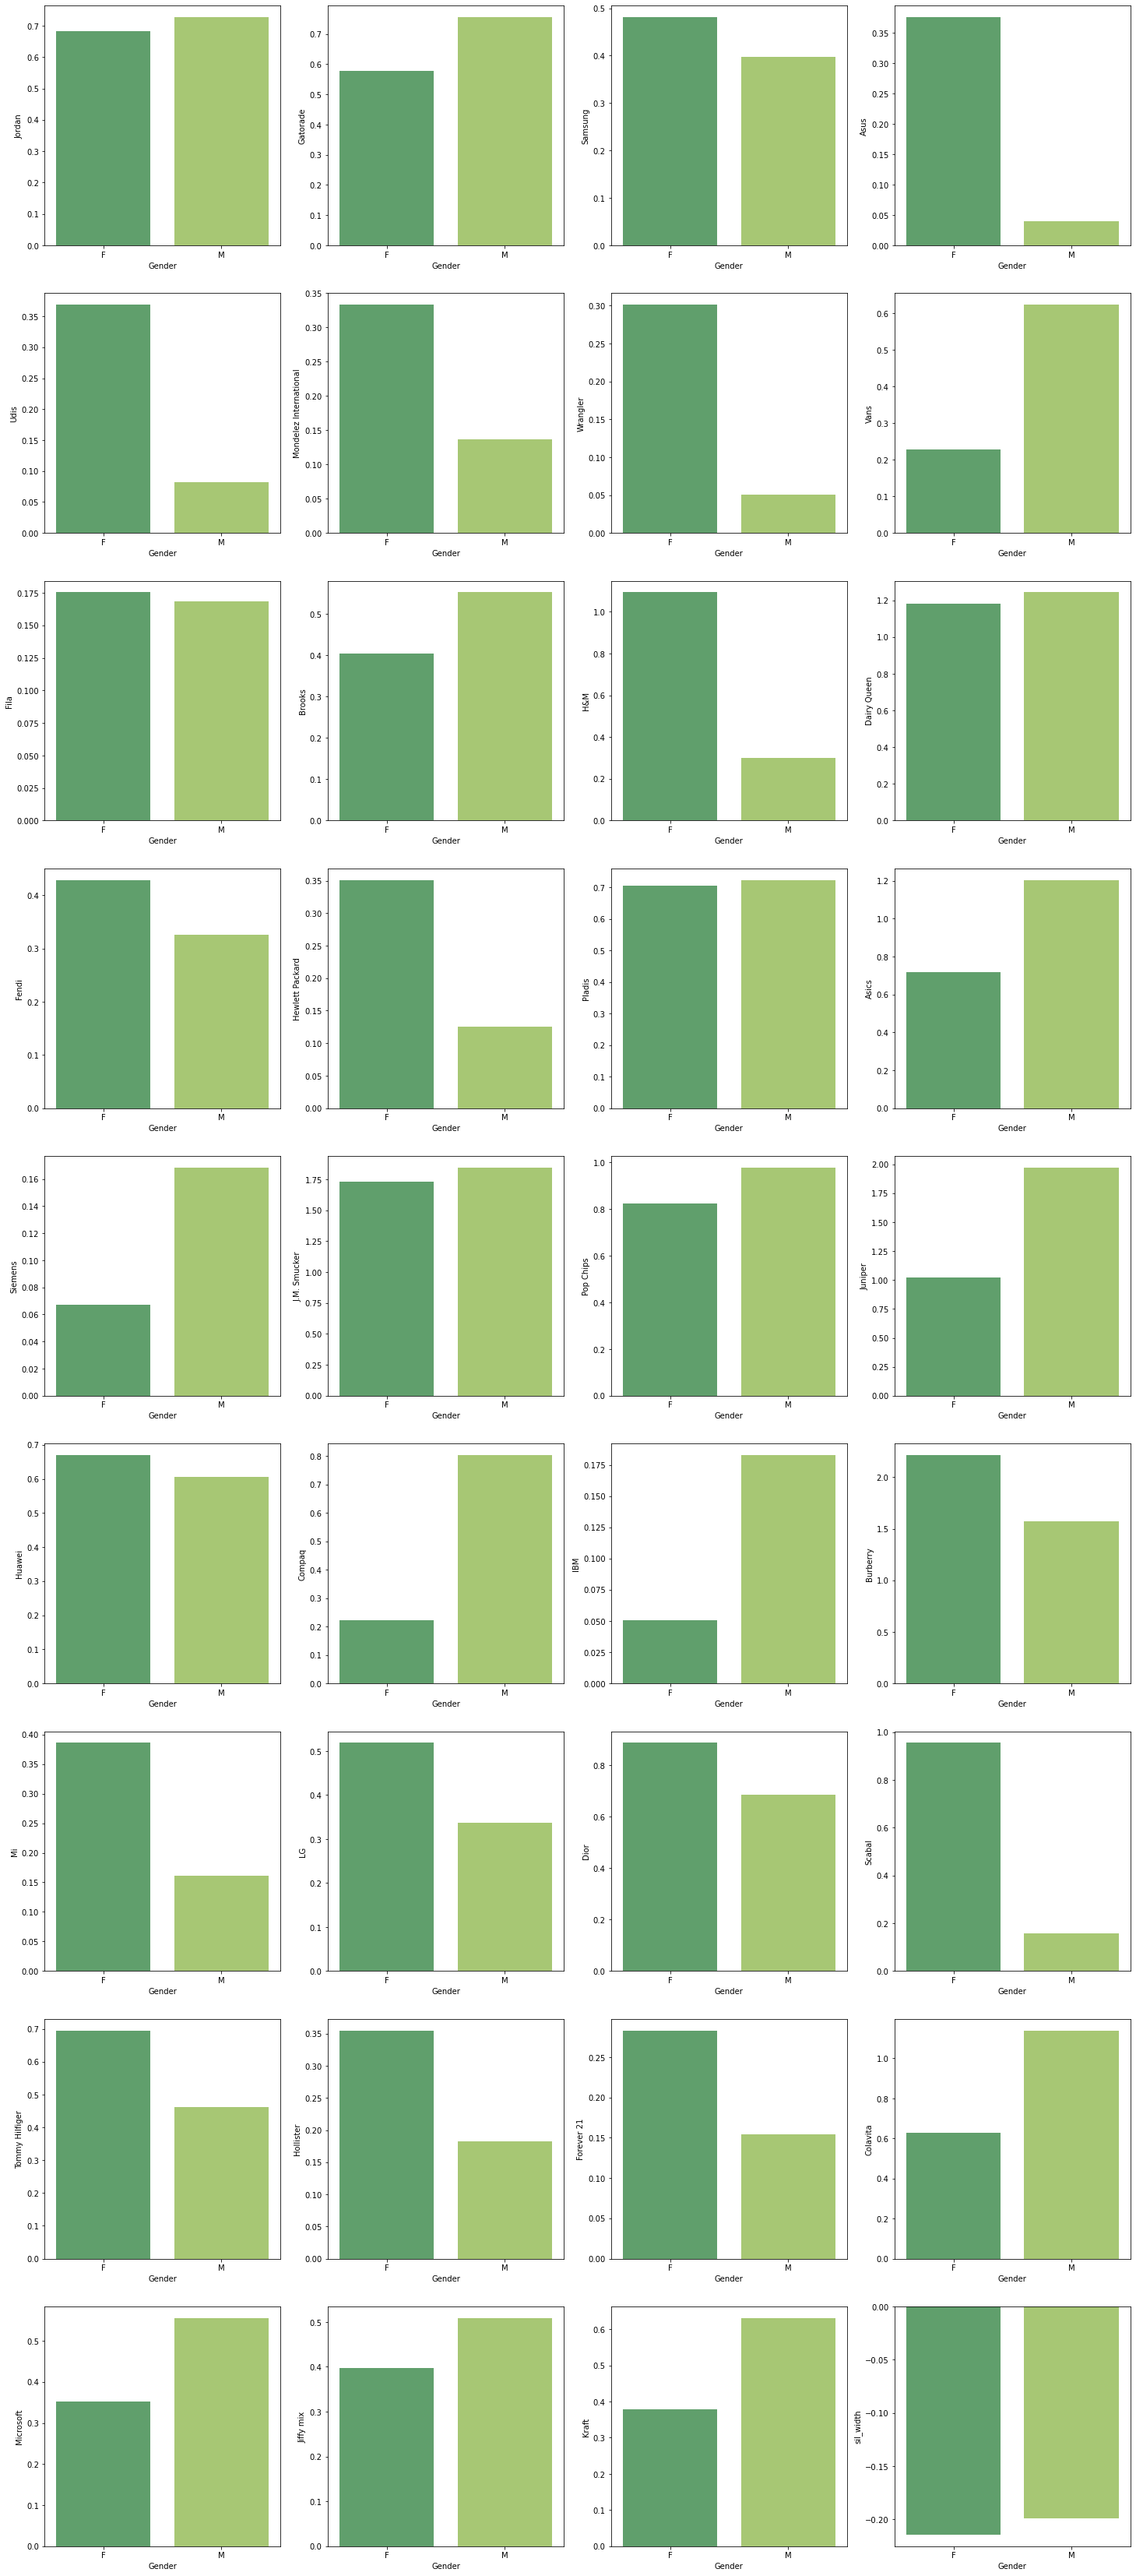

In [77]:
plt.figure(figsize=(25,60))
i=1
for k in df1.columns:
    if k!='Gender'and k!='Orders' and i<37:
        plt.subplot(9,4,i)
        sns.barplot(y=k,x='Gender',data=df1,palette='summer',ci=None)
        i+=1

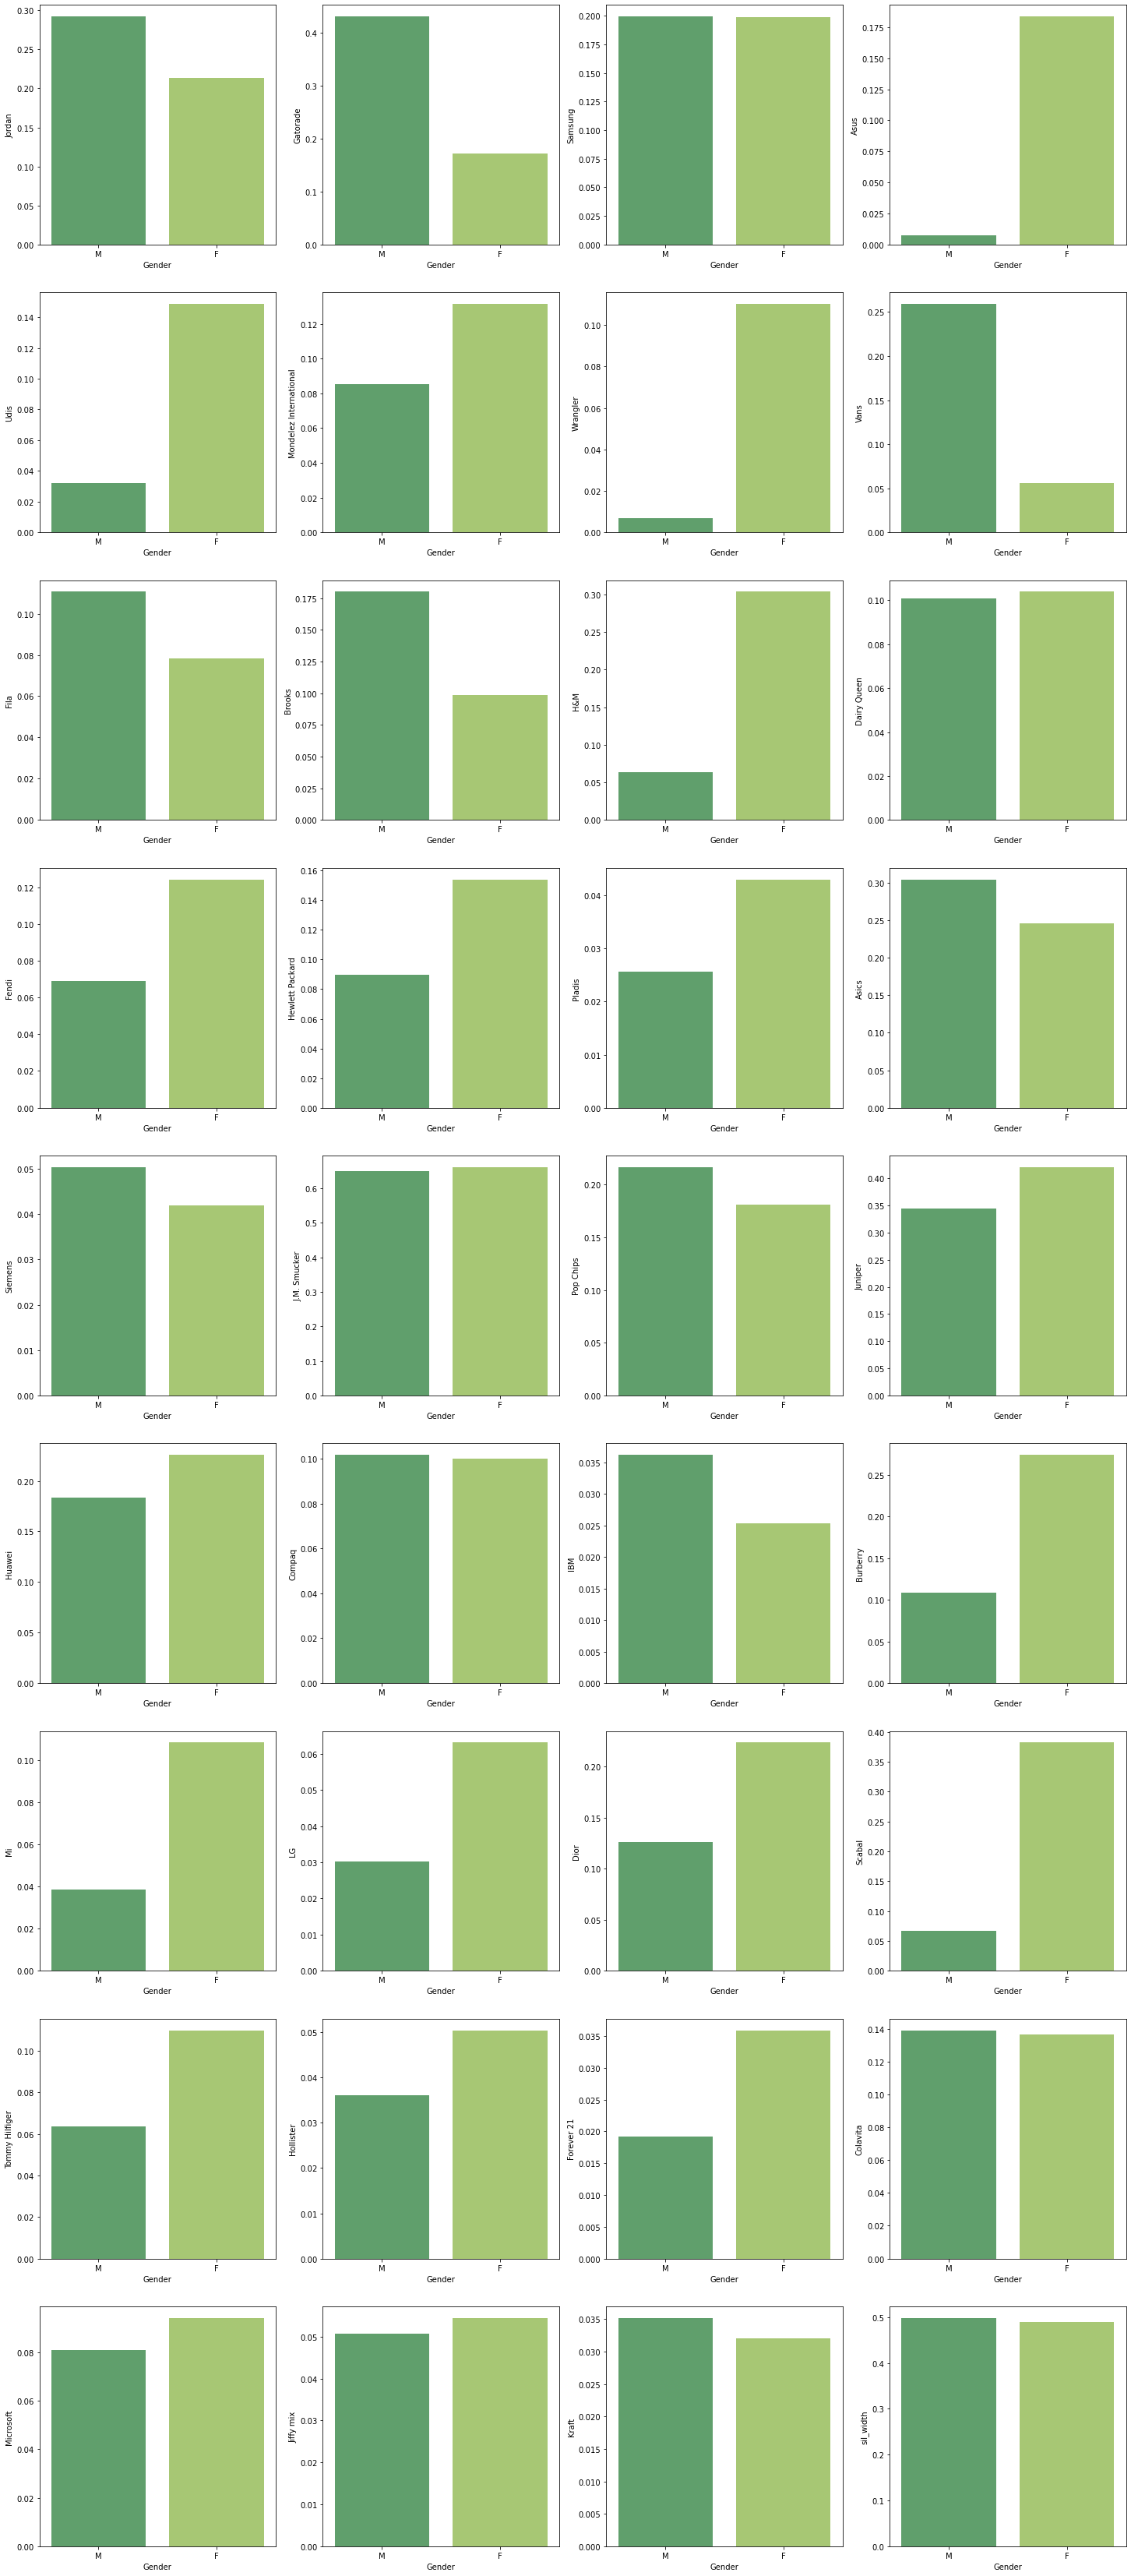

In [81]:
plt.figure(figsize=(25,60))
i=1
for k in df2.columns:
    if k!='Gender'and k!='Orders' and i<37:
        plt.subplot(9,4,i)
        sns.barplot(y=k,x='Gender',data=df2,palette='summer',ci=None)
        i+=1

<AxesSubplot:xlabel='Jiffy mix', ylabel='Kraft'>

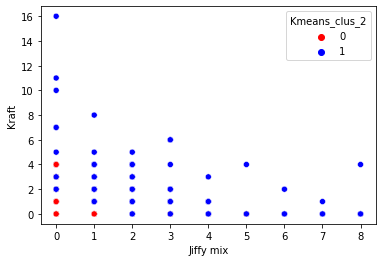

In [66]:
color=['red','blue']
sns.scatterplot(x='Jiffy mix',y='Kraft',data=df,hue='Kmeans_clus_2',palette=color)

In [67]:
import plotly.express as px

In [68]:
px.scatter_3d(df,x='Samsung',y='Jordan',z='Asus',color="Kmeans_clus_2")